# Importing

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [ ]:
df = pd.read_csv('/content/sample_data/Emotion_classify_Data.csv')
df.head(10)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger
7,i finally fell asleep feeling angry useless an...,anger
8,i feel a bit annoyed and antsy in a good way,anger
9,i feel like i ve regained another vital part o...,joy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [ ]:
df.isna().sum()

,0
Comment,0
Emotion,0


In [ ]:
df.Emotion.value_counts()

,count
Emotion,
anger,2000
joy,2000
fear,1937


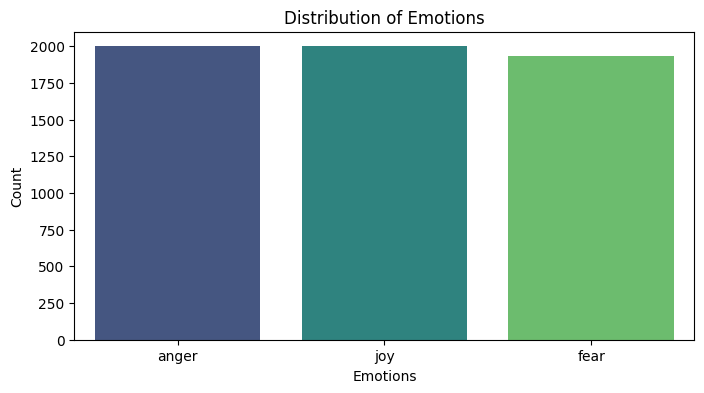

In [ ]:
# Visual representation of distribution of emotions
import matplotlib.pyplot as plt
import seaborn as sns

emotion_counts = df['Emotion'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()

- Balanced Data

# Take sample


In [ ]:
# Extract the value from the 4th row (index 3) and the 1st column (index 0) of the DataFrame
cmt = df.iloc[3,0]

# Extract the value from the 4th row (index 3) and the 2nd column (index 1) of the DataFrame
lbl = df.iloc[3,1]

In [ ]:
print(cmt,lbl,sep='==> ')

ive been really angry with r and i feel like an idiot for trusting him in the first place==> joy


In [ ]:
# Load the spaCy English language model 'en_core_web_sm' into the 'nlp' variable
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(cmt)

# Preprocessing Steps

## Word Tokenization

In [ ]:
for token in doc:
     print(token)

i
ve
been
really
angry
with
r
and
i
feel
like
an
idiot
for
trusting
him
in
the
first
place


## lemmatization

In [ ]:
 for token in doc:
     print(f"{token} ==> {token.lemma_}")

i ==> I
ve ==> ve
been ==> be
really ==> really
angry ==> angry
with ==> with
r ==> r
and ==> and
i ==> I
feel ==> feel
like ==> like
an ==> an
idiot ==> idiot
for ==> for
trusting ==> trust
him ==> he
in ==> in
the ==> the
first ==> first
place ==> place


## stop word indication

In [ ]:
 for token in doc:
     if token.is_stop or token.is_punct:
         print(f'{token} ==> Stop')
     else:
         print(f'{token} ==> not Stop')

i ==> Stop
ve ==> not Stop
been ==> Stop
really ==> Stop
angry ==> not Stop
with ==> Stop
r ==> not Stop
and ==> Stop
i ==> Stop
feel ==> not Stop
like ==> not Stop
an ==> Stop
idiot ==> not Stop
for ==> Stop
trusting ==> not Stop
him ==> Stop
in ==> Stop
the ==> Stop
first ==> Stop
place ==> not Stop


# Preprocess Function

In [ ]:
def preprocess(text):
    # Process the input text using spaCy NLP model
    doc = nlp(text)
    filtered_text = []

    # Iterate over each token in processed document
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_text.append(token.lemma_)

    return ' '.join(filtered_text)

In [ ]:
# Apply the preprocess function to each element in the 'Comment' column
df['Preprocessed_comments'] = df['Comment'].apply(preprocess)

In [ ]:
df.Preprocessed_comments.head()

,Preprocessed_comments
0,seriously hate subject death feel reluctant drop
1,m life feel appalled
2,sit write start dig feeling think afraid accep...
3,ve angry r feel like idiot trust place
4,feel suspicious outside like rapture happen


In [ ]:
df

,Comment,Emotion,Preprocessed_comments
0,i seriously hate one subject to death but now ...,fear,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,anger,m life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,ve angry r feel like idiot trust place
4,i feel suspicious if there is no one outside l...,fear,feel suspicious outside like rapture happen
...,...,...,...
5932,i begun to feel distressed for you,fear,begin feel distressed
5933,i left feeling annoyed and angry thinking that...,anger,leave feel annoyed angry thinking center stupi...
5934,i were to ever get married i d have everything...,joy,marry d ready offer ve get club perfect good l...
5935,i feel reluctant in applying there because i w...,fear,feel reluctant apply want able find company kn...


## Encoding

In [ ]:
encoder = LabelEncoder()
df['Emotion Number'] = encoder.fit_transform(df['Emotion'])

In [ ]:
df

,Comment,Emotion,Preprocessed_comments,Emotion Number
0,i seriously hate one subject to death but now ...,fear,seriously hate subject death feel reluctant drop,1
1,im so full of life i feel appalled,anger,m life feel appalled,0
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feeling think afraid accep...,1
3,ive been really angry with r and i feel like a...,joy,ve angry r feel like idiot trust place,2
4,i feel suspicious if there is no one outside l...,fear,feel suspicious outside like rapture happen,1
...,...,...,...,...
5932,i begun to feel distressed for you,fear,begin feel distressed,1
5933,i left feeling annoyed and angry thinking that...,anger,leave feel annoyed angry thinking center stupi...,0
5934,i were to ever get married i d have everything...,joy,marry d ready offer ve get club perfect good l...,2
5935,i feel reluctant in applying there because i w...,fear,feel reluctant apply want able find company kn...,1


# Featrue Selection

In [ ]:
X = df['Preprocessed_comments']
y = df['Emotion Number']

# Split Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=57)

# Featrue Engineering

In [ ]:
v = TfidfVectorizer() # Factorization (convert into numeric values )
X_train_cv = v.fit_transform(X_train) # fit => (mapping of unique terms to indices), transform => Converts the text data in X_train into a sparse matrix (rows = documents, columns = terms)
X_test_cv  = v.transform(X_test)


In [ ]:
import pickle
# Save the vectorizer
filename = 'vectorizer.pkl'
pickle.dump(v, open(filename, 'wb'))


In [ ]:

X_train_cv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# ML Models

In [ ]:
#Storing the models in a dictionary
models = {
    "LogisticRegression": LogisticRegression(),
    "SupportVectorMachine": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('svc', SVC(probability=True)),
        ('dt', DecisionTreeClassifier())],
        voting='soft'),
    "KNeighbors": KNeighborsClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier()
}

results = []

# Loop over each model in the 'models' dictionary
for model_name, model in models.items():
    #Print the name of the current model being trained and evaluated
    print(f"\nTraining and evaluating model: {model_name}")
    try:
        model.fit(X_train_cv, y_train) #Train the model using training data
        y_pred = model.predict(X_test_cv) # Make predictions
        acc = accuracy_score(y_test, y_pred)

        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        results.append({
            'Model': model_name,
            'Accuracy': acc * 100,
        })

    except Exception as e:
        print(f"Error training {model_name}: {e}")

results_df = pd.DataFrame(results)
display(results_df)


Training and evaluating model: LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       395
           1       0.94      0.92      0.93       391
           2       0.91      0.95      0.93       402

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188

Confusion Matrix:
[[353  16  26]
 [ 17 360  14]
 [ 12   8 382]]

Training and evaluating model: SupportVectorMachine
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       395
           1       0.94      0.92      0.93       391
           2       0.90      0.95      0.93       402

    accuracy                           0.93      1188
   macro avg       0.93      0.92      0.93      1188
weighted avg       0.93      0.93      0.93      1188

Confusion Matrix:
[[357 

,Model,Accuracy
0,LogisticRegression,92.171717
1,SupportVectorMachine,92.508418
2,DecisionTree,92.929293
3,RandomForest,92.845118
4,BaggingClassifier,93.518519
5,VotingClassifier,93.602694
6,KNeighbors,81.818182
7,CatBoost,94.696970
8,XGBoost,93.518519
9,LightGBM,86.279461


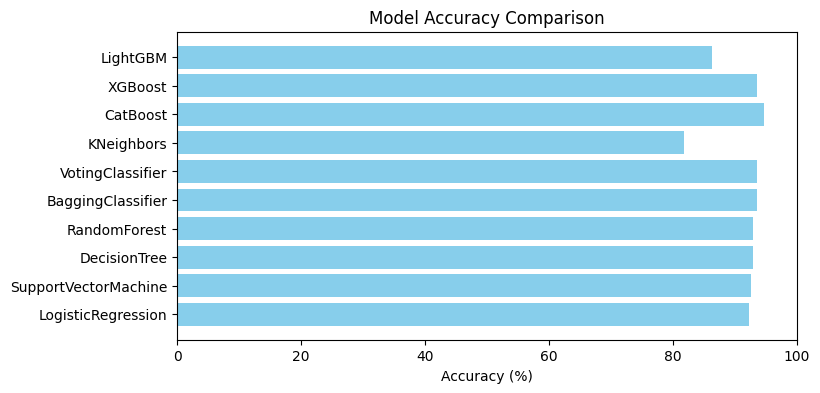

In [ ]:
# Plot the accuracy comparison
plt.figure(figsize=(8, 4))
plt.barh(results_df['Model'],
         results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 100)
plt.show()

Results by accuracy in descending order

In [ ]:
# Sort the results by Accuracy in descending order
sorted_results = results_df.sort_values(by='Accuracy', ascending=False)

# Display the sorted results
print(sorted_results)

# Identify the best model
best_model_name = sorted_results.iloc[0]['Model']
best_model_accuracy = sorted_results.iloc[0]['Accuracy']

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}%")


                  Model   Accuracy
7              CatBoost  94.696970
5      VotingClassifier  93.602694
8               XGBoost  93.518519
4     BaggingClassifier  93.518519
2          DecisionTree  92.929293
3          RandomForest  92.845118
1  SupportVectorMachine  92.508418
0    LogisticRegression  92.171717
9              LightGBM  86.279461
6            KNeighbors  81.818182
The best model is CatBoost with an accuracy of 94.70%


# Cross-validation


In [ ]:
# Example usage (replace with your actual best model name):
best_model_name = "CatBoost"

from sklearn.model_selection import cross_val_score

if best_model_name in models:
    best_model = models[best_model_name]

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(best_model, X_train_cv, y_train, cv=5)

    print(f"Cross-validation scores for {best_model_name}: {cv_scores}")
    print(f"Average cross-validation score: {np.mean(cv_scores)}")

    # Calculate and print the standard deviation of cross-validation scores
    cv_std = np.std(cv_scores)
    print(f"Standard deviation of cross-validation scores: {cv_std}")
else:
    print(f"Model '{best_model_name}' not found in the 'models' dictionary.")

Cross-validation scores for CatBoost: [0.93263158 0.93157895 0.94631579 0.93052632 0.94625922]
Average cross-validation score: 0.9374623703621541
Standard deviation of cross-validation scores: 0.007236403284027992


# Hyperparameter Tuning


In [39]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold # Import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Example hyperparameter tuning for CatBoost (replace with your best model)
if best_model_name == "CatBoost":
    param_dist = {
        'iterations': [100, 200, 300, 400, 500],  # Number of boosting iterations
        'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
        'depth': [4, 6, 8, 10],  # Depth of the trees
        'l2_leaf_reg': [1, 3, 5, 7], # L2 regularization term on weights of leaves
        'border_count': [32, 64, 128],
        'bagging_temperature': [0, 0.5, 1, 2]
    }

    # Use Stratified K-Folds cross-validator
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Use RandomizedSearchCV for a faster search
    random_search = RandomizedSearchCV(
        CatBoostClassifier(silent=True),
        param_distributions=param_dist,
        n_iter=20,  # Number of parameter settings that are sampled
        scoring='accuracy',
        cv=cv,  # Number of cross-validation folds
        n_jobs=-1,  # Use all available CPU cores
        verbose=1  # Print progress messages
    )

    random_search.fit(X_train_cv, y_train)

    print("Best hyperparameters:", random_search.best_params_)
    print("Best accuracy score:", random_search.best_score_)

    # Evaluate the best model on the test set
    best_catboost_model = random_search.best_estimator_
    y_pred = best_catboost_model.predict(X_test_cv)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Accuracy on test set:", accuracy)
    print("Precision on test set:", precision)
    print("Recall on test set:", recall)
    print("F1-score on test set:", f1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'learning_rate': 0.2, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 6, 'border_count': 128, 'bagging_temperature': 0}
Best accuracy score: 0.940198990627253
Accuracy on test set: 0.9503367003367004
Precision on test set: 0.9507329865893138
Recall on test set: 0.9503367003367004
F1-score on test set: 0.9503860822548666


In [42]:
# Install streamlit library
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [46]:
!pip install pyngrok # Install the pyngrok library

In [51]:
# Set up ngrok and run the Streamlit app
from pyngrok import ngrok

# Authenticate ngrok with your authtoken
ngrok.set_auth_token('2rA3u05gpQ5Cwd9XNVCKfdbBLTA_7dTQU6vTPMApkBHRnGFhF')

In [52]:
# Start ngrok tunnel
public_url = ngrok.connect(8501, proto="http")  # Specify the port as an integer and the protocol as 'http'
print(public_url)

# Run the Streamlit app
!streamlit run app.py &>/dev/null&

NgrokTunnel: "https://a2f5-34-16-157-240.ngrok-free.app" -> "http://localhost:8501"


In [49]:
# Kill the ngrok process
ngrok.kill()